# Loading Dataset from Vehicle.csv

In [1]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report
from sklearn import metrics
warnings.filterwarnings("ignore")

In [2]:
#importing custom python modules
import modules as Mvehicle
import ModelEvaluation as model
import VisualizationForMisclassification as visualize
import TrainTest_Split_Traversal as train_test_split
import CrossValidationFold_Traversal as Kfolf_traversal

In [3]:
vehicle = pd.read_csv('../../../datasets/vehicles.csv')

# Exploratory Data Analysis

In [4]:
vehicle.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [5]:
Mvehicle.dataset_statistics(vehicle)

Shape of the dataset:  (846, 19)

Features of the dataset are: 
 ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']

Target Labels of dataset are: 
 ['van' 'saab' 'bus' 'opel']


In [6]:
#Dataset Label value Count to check if the data is unbalanced
vehicle['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

## DataSet Statistics 

By comapring standard deviation and mean your data points, it is observed that our data points are 
almost tend to be close to the means we have few outliers present in the dataset.

In [7]:
#to check if outliers are present in the data
vehicle.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


#  Data Visualization  

## Bar Chart


BarChart for analyzing the frequency of Categorical labled class.



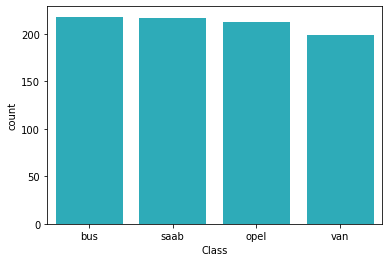

In [8]:
Mvehicle.BarChart(vehicle)

## Correlation Matrix

Correlation helps you to find out the relationship between variables. According to Correlation graph,

-  it can be observed that KURTOSIS_ABOUT_MAJOR AND KUROSIS_ABOUT_MINOR has a little impact on overall data. For the reason these features can be eliminated from the dataset. On the Contraty, SCALED_VARIANCE_MINOR is perfect highly correlated to SCATTER_RATIO, means we can also eliminate one of these two variables.

Correlation Analysis



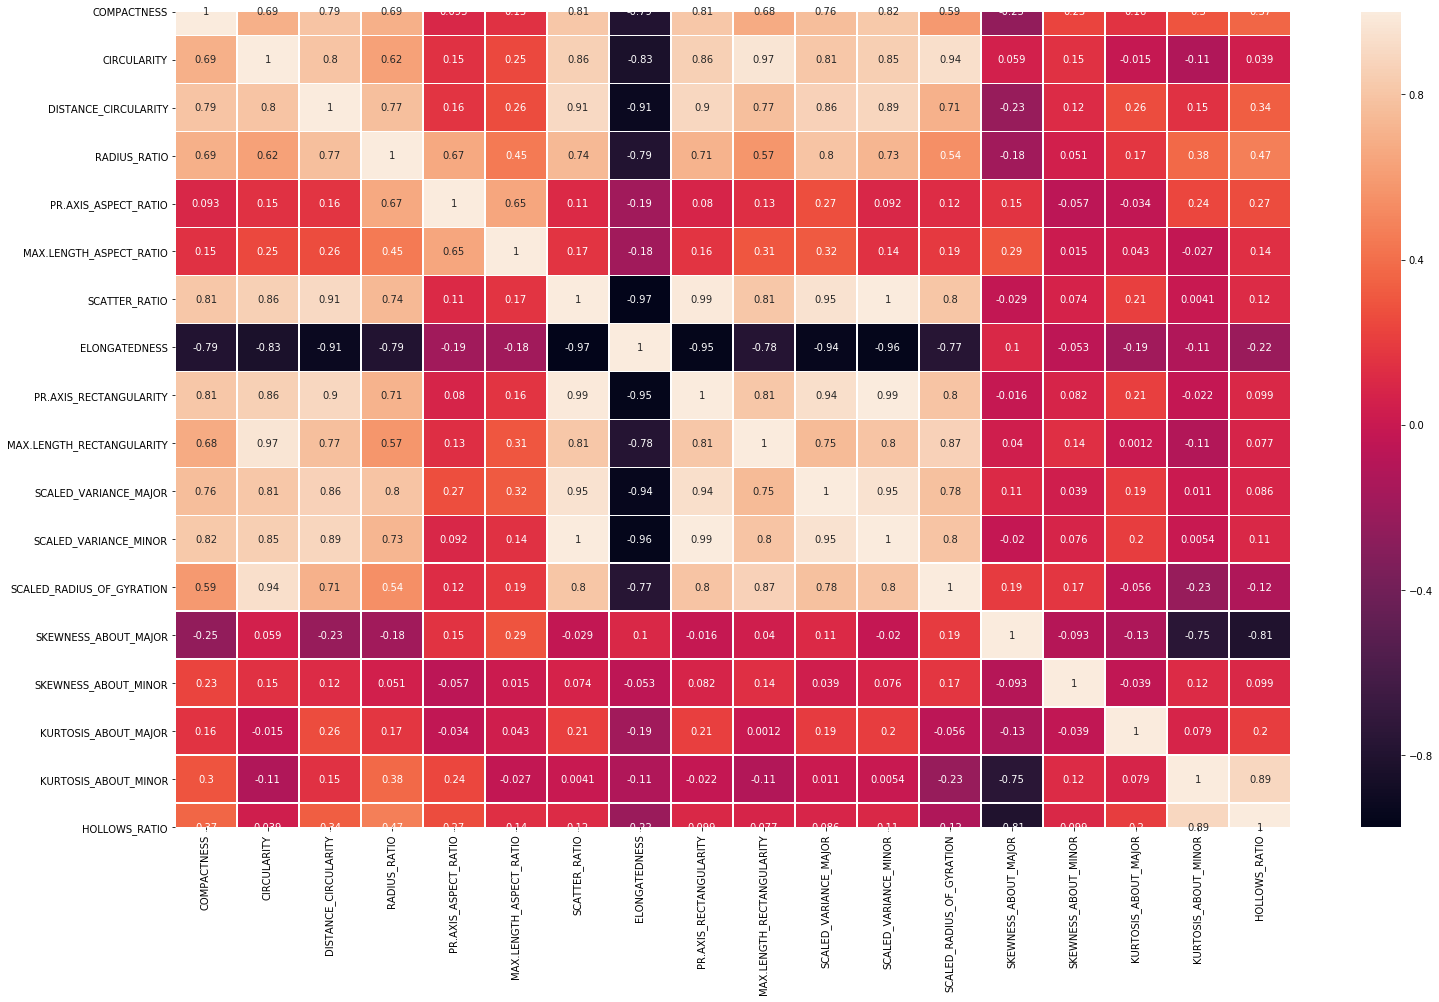

In [9]:
Mvehicle.Correlation_matrix(vehicle)

# Label Encoding

Label Encoding is used to convert the categorical labels to its numeric representation. 

In [10]:
vdataset = Mvehicle.label_encoding(vehicle)
vdataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class,Class_code
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus,0


# Model Evaluation 

Model Evaluation is done for determinig the accuracy of differnet classifiers using KFold Cross Validation.
For this Purpose Folloing classifiers are used:
    - Logistic Regression
    - K-Nearest Neighbors
    - Decision Tree
    - Gausian NaiveBayes
    - Support Vector Machine
    - Random Forest

According to the graph shown below, we can compare the range and distribution of the accuracy for each model.
As shown, we can conclude that SVM and Logistic Regression classifiers performance will be better as compare to other classifiers. For this dataset we will be using Support Vector Machine

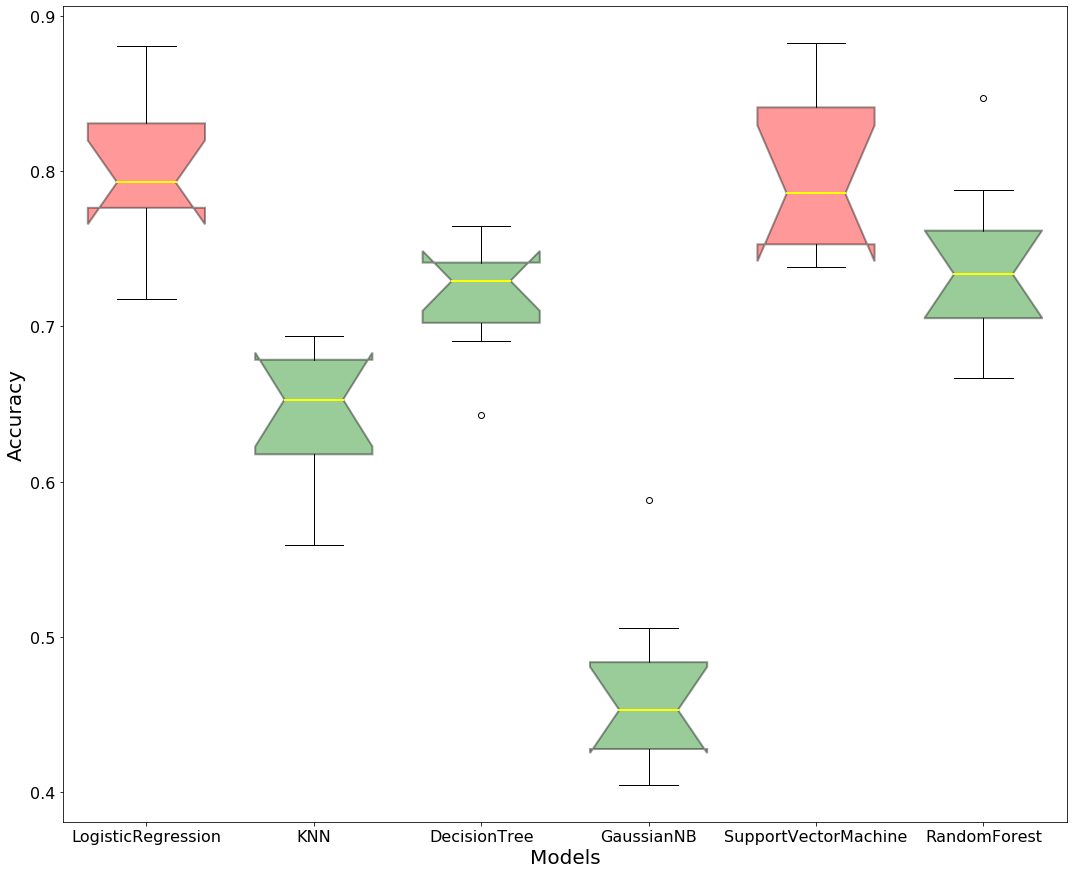

In [11]:
model.Evaluation_model(vdataset)

# Training Model

Splitting the data into two set in a ratio of 70% for training set and 30% for testing set.

In [12]:
#Splitting data for training and testing
X_train, X_test, y_train, y_test = Mvehicle.splitting_train_test_data(vdataset)

# Training Model with Support Vectore Machine

Performing Hyper-Parameters tuning of Support Vectore Machine using GridSearch techniuqe

In [13]:
classifier = model.SVM_train(X_train,y_train)

In [14]:
classifier = classifier.fit(X_train, y_train)

In [15]:
y_predict = Mvehicle.test_classifier(classifier , X_test)

In [16]:
accuracy =  metrics.accuracy_score(y_test, y_predict)
print("Accuracy: ",accuracy*100)

Accuracy:  78.34645669291339


Accuracy with <b> Support Vector Machine </b> is 78% , which is not comparatively good than Logistic Regression that was 80% even after tuning the hyperparameters of Logistic Regression. Further I would be using other comparative techniques to evaluate model, For now I have used <b> Support Vectore Machine </b> classifier which altogether has not been a good model for this dataset.

# Visualization of Misclasssification

The below stacked bar chart represents the misclassified points of Support Vector Machine Classifier. This model is also not able to distinguish well between the <b> saab </b> and <b> opel </b> class and mixing both of them. As it can be observed from the graph that the false positive ratio of <b> saab </b> and <b> opel </b> is maximum as compare to other classes.

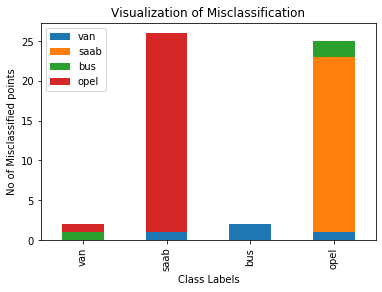

In [17]:
visualize.Misclasssification_visualization(y_test, y_predict,vdataset)

##  Conclusion

By comparing the misclassification of both of the classifiers <b> Logistic Regression </b> and
<b> Support Vector Machine </b> we can conclude overall our model is not able to classify between <b> saab </b>
and <b> opel </b> class. We might be missing some details in the dataset. Further I would look in the dataset and
try to find the problem as to why our model is overfitting the data.

# Traversal Of Train Test Split

In Train Test Split Traversal, an evaluation metric is computed for <b> Support Vector Machine </b> with different split ratio of train and test set using repeated K-Fold cross-validation over K values in a range 2 to 5. Further a <b> Line Plot </b> is drawn for each split ratio for traing and testing set with the performance score.

------------------------------------------------------------------
Line plot with Training size =  80.0 % and Testing Size = 20.0 %. 



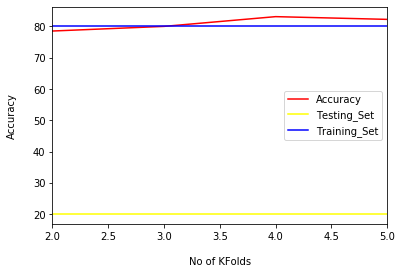

------------------------------------------------------------------
Line plot with Training size =  60.0 % and Testing Size = 40.0 %. 



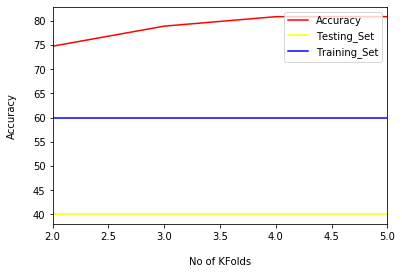

------------------------------------------------------------------
Line plot with Training size =  40.0 % and Testing Size = 60.0 %. 



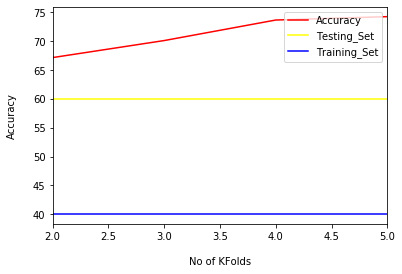

------------------------------------------------------------------
Line plot with Training size =  20.0 % and Testing Size = 80.0 %. 



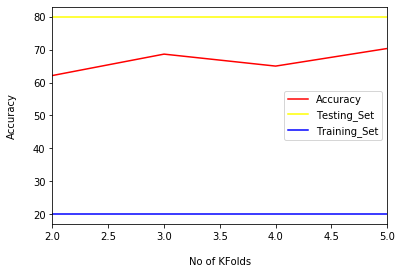

In [18]:
classifier = model.SVM_train(X_train,y_train)
split_matrix = train_test_split.train_test_split_traversal(classifier , vdataset)

## Performance score with different train and test split proportion

In [19]:
split_matrix

,KFold,Training_Set,Testing_Set,Accuracy
0,2.0,80.0,20.0,78.547920
1,3.0,80.0,20.0,80.029619
2,4.0,80.0,20.0,83.140389
3,5.0,80.0,20.0,82.269041
4,2.0,60.0,40.0,74.754132
5,3.0,60.0,40.0,78.897342
6,4.0,60.0,40.0,80.855308
7,5.0,60.0,40.0,80.863735
8,2.0,40.0,60.0,67.167367
9,3.0,40.0,60.0,70.119574


## Conclusion

After traversing through different splits ratio of train and test set with a KFold Cross Validation, It can be concluded that <b> Support Vector Machine</b> with <b> K = 4 </b>  Folds over a split ratio of <b> 80% </b> for training and <b> 20% </b> for testing gives the highest accuracy of <b> 83% .</b>

# Comparative performnace of kfold Cross Validation and Performance Score

Evaluation metric is computed for Support Vector Machine using repeated K-fold cross-validation over a grid of K values from 2 to 10.

In [20]:
matrix = Kfolf_traversal.CrossValidationFolds_Traversal(classifier,vdataset)
matrix

,KFold,Accuracy
0,2.0,77.068989
1,3.0,81.333295
2,4.0,81.097002
3,5.0,81.338585
4,6.0,81.316790
5,7.0,81.313193
6,8.0,81.671576
7,9.0,82.387382
8,10.0,82.035031


## Visualization of KFold Cross Validation Traversal with it's correspong performance score

From the below graph we can conclude that the performance estimate changes if we change the no of fold in Cross Validation
and as shown in the graph the classifier gives the higher performance when on 9 Folds which is <b> 82.3% </b>

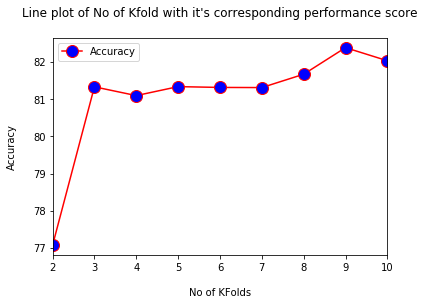

In [21]:
Kfolf_traversal.Visulaize_CrossValidationFolds_Traversal(matrix)